## 이미지 필터 사용해보기

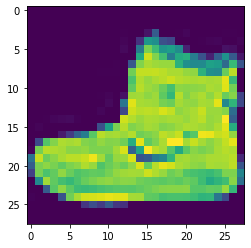

In [2]:
from tensorflow.keras.datasets import fashion_mnist

# 데이터를 다운받습니다.
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

import matplotlib.pyplot as plt
plt.imshow(x_train[0]) # 첫 번째 데이터를 그려봅니다. 

## 이미지 필터 정의하기

In [ ]:
import numpy as np
import cv2

# 가로선을 추출하기 위한 필터
horizontal_filter = np.array([[1., 2., 1.], 
                             [0., 0., 0.], 
                             [-1., -2., -1.]])

# 세로선을 추출하기 위한 필터
vertical_filter = np.array([[1., 0., -1.],
                           [2., 0., -2.],
                           [1., 0., -1.]])

# 계산의 편의를 위해 이미지의 크기를 (27, 27)로 줄입니다.
test_image = cv2.resize(x_train[0], (27, 27))
image_size = test_image.shape[0]
output_size = int((image_size - 3)/1 + 1)
print('output의 크기 : %d' % output_size)

## 이미지 필터 적용하기

In [ ]:
filter_size = 3

def get_filtered_image(filter):
    filtered_image = np.zeros((output_size, output_size))
    for i in range(output_size):
        for j in range(output_size):
            # 합성곱 연산
            indice_image = test_image[i:(i + filter_size), j:(j + filter_size)] * filter
            indice_sum = np.sum(indice_image)

            if(indice_sum > 255):
                indice_sum = 255
            filtered_image[i, j] = indice_sum
      
    return filtered_image

vertical_filtered_image = get_filtered_image(vertical_filter)
horizontal_filtered_image = get_filtered_image(horizontal_filter)

plt.subplot(1, 2, 1)
plt.title('vertical')
plt.imshow(vertical_filtered_image)

plt.subplot(1, 2, 2)
plt.title('horizontal')
plt.imshow(horizontal_filtered_image)
plt.show()

## 이미지 필터를 적용한 최종 결과

In [ ]:
sobel_image = np.sqrt(np.square(horizontal_filtered_image) + np.square(vertical_filtered_image))

plt.imshow(sobel_image)

## for-loop를 사용하여 풀링 연산 구현하기

original image shape: (28, 28)
pooled image shape: (14, 14)


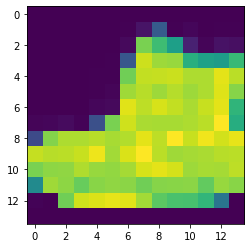

In [37]:
import numpy as np

image = x_train[0]
image_x = image.shape[0]
image_y = image.shape[1]
new_image_x = int(image_x / 2)
new_image_y = int(image_y / 2)

pooled_image = np.zeros((new_image_x, new_image_y))

print(f'original image shape: ({image_x}, {image_y})')
print(f'pooled image shape: ({new_image_x}, {new_image_y})')

for x in range(0, image_x, 2):
    for y in range(0, image_y, 2):
        pooled_image[int(x/2), int(y/2)] = np.max(image[x:x + 2, y:y + 2])
        
plt.imshow(pooled_image)